# Lista 05 - Fundamentos Estatísticos para Ciência dos Dados A
- Aluno: Thiago Martin Poppe
- Matrícula: 2017014324

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# Questão 04)

- Divida a tela gráfica 2x2 e desenhe o gráfico das densidades de probabilidade de uma $N(0,1)$ na posição (1,1) da janela, uma $N(2,1)$ na posição (1,2), uma $N(0,4)$ na posição (2,1) e uma $N(2,4)$ na posição (2,2).

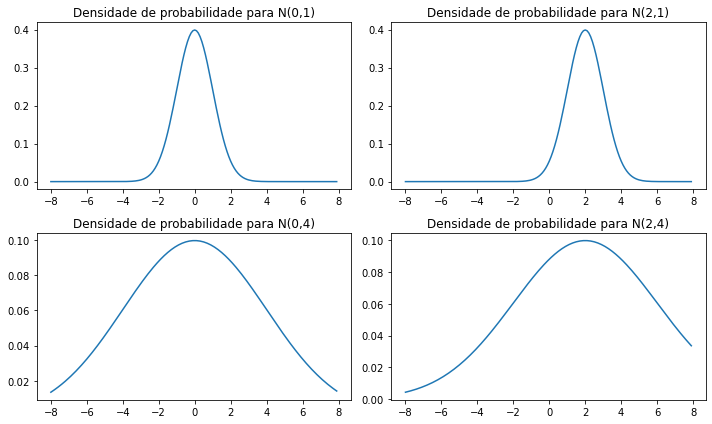

In [2]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

# Por questões visuais, optei por limitar o eixo x entre (-8, 8)
x = np.arange(-8, 8, 0.1)

ax1.set_title('Densidade de probabilidade para N(0,1)')
ax2.set_title('Densidade de probabilidade para N(2,1)')
ax3.set_title('Densidade de probabilidade para N(0,4)')
ax4.set_title('Densidade de probabilidade para N(2,4)')

ax1.plot(x, ss.norm(0,1).pdf(x))
ax2.plot(x, ss.norm(2,1).pdf(x))
ax3.plot(x, ss.norm(0,4).pdf(x))
ax4.plot(x, ss.norm(2,4).pdf(x))

fig.tight_layout()
fig.show()

- Qual o ponto $x$ em que $f(x)$ assume o valor máximo? Este ponto depende de $\sigma$? E a altura $f(x)$ no ponto de máximo, ela depende de $\sigma$?

- **Resposta:** A função $f(x)$ assume valor máximo quando $x = \mu$, não dependendo assim do valor de $\sigma$. Já a altura de $f(x)$ depende de $\sigma$ nesse ponto, uma vez que teremos:
$$
    f(x=\mu) = \frac{1}{\sqrt{2\pi}\sigma}
$$

- No caso da gaussiana, o parâmetro $\sigma$ controla a variação em torno de $\mu$. Para uma $N(10,5)$ verifique que a área debaixo da densidade entre $10 − 2\sqrt{5}$ e $10 + 2\sqrt{5}$ é aproximadamente igual a 0.95. Este é um resultado geral: no caso de uma gaussiana, a chance de observar um valor distante mais de $2\sigma$ do valor esperado e central $\mu$ é aproximadamente 0.05.


- **Nota**: Pela explicação do resultado geral, percebi que pode haver um erro na questão... Na verdade queremos encontrar a área entre $10 - 2*5$ e $10 + 2*5$, uma vez que $\sigma=5$, e não $\sqrt{5}$.

In [3]:
p1 = ss.norm(10,5).cdf(10 + 2 * 5) # P(X <= 10 + 2*5)
p2 = ss.norm(10,5).cdf(10 - 2 * 5) # P(X <= 10 - 2*5)

print('Área debaixo da densidade será aproximadamente {:.5f}'.format(p1 - p2))

Área debaixo da densidade será aproximadamente 0.95450


- Gere 200 valores aleatórios independentes de $X \sim N(\mu, \sigma)$ com $\mu$ e $\sigma$ escolhidos por você. Faça um histograma forçando a área total ser igual a 1 e sobreponha a curva da densidade gaussiana que você usou. Eles se parecem?


- **Resposta:** Podemos observar que ambos plots se parecem sim. Porém, em pouquíssimas execuções do código, o histograma ficou bem diferente da curva.

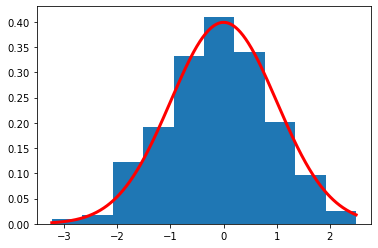

In [4]:
mu, sigma = 0, 1
random_values = ss.norm(mu, sigma).rvs(size=200)

x = np.arange(min(random_values), max(random_values), 0.01)

plt.hist(random_values, density=True)
plt.plot(x, ss.norm(mu, sigma).pdf(x), linewidth=3, color='red')
plt.show()

# Questão 07)

- Seja $X \sim \text{exp}(1/3)$. Isto é, $X \sim \text{exp}(\lambda)$ com $\lambda = 1/3$. Isto implica que a densidade $f(x)$ é igual a

$$
    f(x) = 
        \begin{cases}
            0, &\text{ se } x < 0 \\
            \frac{1}{3}\text{exp}\left(-\frac{1}{3}x\right), &\text{ se } x \geq 0
        \end{cases}
$$

- Calcule $\mathbb{E}(X)$, $\mathbb{F}(x)$ e $\mathbb{P}(X > 3)$.

### 1) Cálculo de $\mathbb{E}(X)$
$$
    \begin{aligned}
        \mathbb{E}(X) = \int_{-\infty}^{+\infty} x*f(x)\,dx &= \int_{-\infty}^0 x*f(x)\,dx + \int_0^{+\infty} x*f(x)\,dx \\
        &= \int_{-\infty}^0 x*0\,dx + \int_0^{+\infty} x*\frac{1}{3}\text{exp}\left(-\frac{1}{3}x\right)\,dx \\
        &= \frac{1}{3}\int_0^{+\infty} x\text{exp}\left(-\frac{1}{3}x\right)\,dx \text{ [resolver via integração por partes]}\\
        &= \frac{1}{3}\left(-3x\text{exp}\left(-\frac{1}{3}x\right)\Big\rvert_0^{+\infty} + 3\int_0^{+\infty} \text{exp}\left(-\frac{1}{3}x\right)\,dx\right) \\
        &= \frac{1}{3}\left(0 - 9\text{exp}\left(-\frac{1}{3}x\right)\Big\rvert_0^{+\infty}\right) \\ \\
        &= 3 = \lambda^{-1} \text{ (como esperado)}\\
    \end{aligned}
$$
       
### 2) Cálculo de $\mathbb{F}(x)$
$$
   \begin{aligned}
   \mathbb{F}(x) = \int_{-\infty}^x f(t)\,dt &= \int_{-\infty}^0 f(t)\,dt+ \int_0^x f(t)\,dt \\
   &= \int_{-\infty}^0 0\,dt + \int_0^x \frac{1}{3}\text{exp}\left(-\frac{1}{3}t\right)\,dt \\
   &= \frac{1}{3}\int_0^x \text{exp}\left(-\frac{1}{3}t\right)\,dt \\
   &= \frac{1}{3}\left(-3\text{exp}\left(-\frac{1}{3}t\right)\Big\rvert_0^x \right) \\
   &= \frac{1}{3}\left(-3\text{exp}\left(-\frac{1}{3}x\right) - (-3\text{exp}(0))\right) \\
   &= 1 - \text{exp}\left(-\frac{1}{3}x\right)
   \end{aligned}
$$
       
### 3) Cálculo de $\mathbb{P}(X > 3)$
$$
   \begin{aligned}
   \mathbb{P}(X > 3) = 1 - \mathbb{P}(X \leq 3) &= 1 - \mathbb{F}(3) \\
   &= 1 - (1 - \text{exp}(-1)) \\
   &= \text{exp}(-1) \\
   \end{aligned}
$$

# Questão 12)
- Gere 100 valores i.i.d. de uma $N(0,1)$ e teste se eles de fato vem de uma $N(0,1)$ usando o teste de Kolmogorov. Repita a simulação 1000 vezes e colete os valores da estatística $D$ e do p-valor nestas 1000 simulações.

In [5]:
n_iter = 1000
distribution = ss.norm(0,1)
simulation = {'Dvalues': [], 'pvalues': []}

for _ in range(n_iter):
    random_values = distribution.rvs(size=100)
    kolmogorov = ss.kstest(random_values, distribution.cdf)
    
    simulation['Dvalues'].append(kolmogorov.statistic)
    simulation['pvalues'].append(kolmogorov.pvalue)

- Faça um histograma padronizado dos 1000 valores de $D$. Qual é o intervalo dentro do qual você pode esperar os valores de $D$ quando o modelo proposto coincide com o processo gerador de dados?


- **Resposta:** através do histograma padronizado da estatística $D$, nós podemos dizer que o intervalo esperado será aproximadamente $(0.04, 0.15)$. Este intervalo está próximo do esperado, uma vez que quando multiplicamos esses valores por $\sqrt{n} = 10$, nós teremos um intervalo similar ao intervalo estudado em sala de aula para os valores de $\sqrt{n}D_n$.
    - ***Nota:*** ao observarmos o histograma abaixo, podemos ver que o eixo y possui valores acima de 1, o que a princípio pode parecer um erro da geração do histograma. Porém, é importante lembrar que a **soma das áreas** deve ser igual a 1, e não somente as alturas!

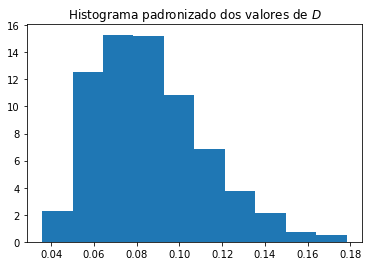

In [6]:
plt.title('Histograma padronizado dos valores de $D$')
plt.hist(simulation['Dvalues'], density=True)
plt.show()

- Faça um histograma dos p-valores obtidos. Ele deve ter uma distribuição aproximadamente uniforme no intervalo $(0,1)$. Qual a proporção dos p-valores simulados que ficaram menores que 0.05?

In [7]:
counter = 0
for pvalue in simulation['pvalues']:
    if pvalue < 0.05:
        counter += 1
        
print('Proporção dos p-valores menores que 0.05 é aproximadamente {:.2f}%'.format(100 * (counter / n_iter)))

Proporção dos p-valores menores que 0.05 é aproximadamente 4.80%


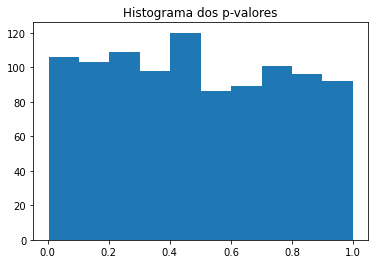

In [8]:
plt.title('Histograma dos p-valores')
plt.hist(simulation['pvalues'])
plt.show()

# Questão 16)

- Gere alguns dados com $n = 50$ de uma normal qualquer e use a função *ks.test()* para verificar se o teste rejeita o modelo. Faça o teste de dois modos: use o modelo correto que você usou para gerar seus dados e depois use um modelo diferente deste alterando, por exemplo, o valor de $\mu$ ou $\sigma$.
    - A saída de *ks.test()* fornece o valor de $D_n = \max_x |\hat{\mathbb{F}}_n(x) − \mathbb{F}(x)|$ e o p-valor. Dissemos em sala que se $\sqrt{n}D_n$ estiver aproximadamente entre 0.4 e 1.4, podemos aceitar o modelo (não há evidência nos dados para rejeitar o modelo). Se $\sqrt{n}D_n > 1.36$, rejeitamos o modelo. 

In [9]:
# Geraremos 50 valores aleatórios que seguem uma distribuição N(2,5)
data = ss.norm(2,5).rvs(size=50)
print('Amostra dos dados:', data[:5])

Amostra dos dados: [-2.77783816  1.71753232 -1.4052955   4.94936914 -6.11308574]


In [10]:
def kolmogorov_test(data, model):
    results = ss.kstest(data, model.cdf)
    value = np.sqrt(len(data)) * results.statistic
    
    status = 'aceito' if value >= 0.4 and value <= 1.4 else 'rejeitado'
    print('O valor de sqrt(n)Dn é aproximadamente {:.5f}'.format(value))
    print('Portanto, o modelo será {}!'.format(status))

In [11]:
kolmogorov_test(data, ss.norm(2,5))

O valor de sqrt(n)Dn é aproximadamente 0.96050
Portanto, o modelo será aceito!


In [12]:
kolmogorov_test(data, ss.norm(0,1))

O valor de sqrt(n)Dn é aproximadamente 3.23190
Portanto, o modelo será rejeitado!


# Questão 21)

- Gere 350 valores de uma distribuição gamma com $\alpha = 9$ e $\beta = 3$. Faça um histograma padronizado destes números gerados e sobreponha a curva densidade. Ficam parecidos?


- **Resposta:** Podemos observar que ambos plots se parecem sim. Porém, em pouquíssimas execuções do código, o histograma ficou bem diferente da curva.

In [13]:
# A distribuição gamma no Python é meio diferente...
# O parâmetro 'a' corresponde ao parâmetro alpha, enquanto que 'scale' ao valor 1 / beta

distribution = ss.gamma(a=9, scale=1/3)
random_values = distribution.rvs(size=350)

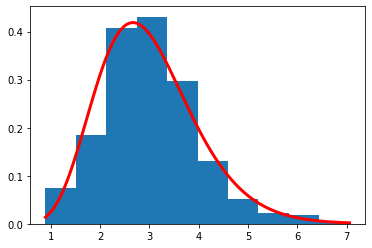

In [14]:
x = np.arange(min(random_values), max(random_values), 0.01)

plt.hist(random_values, density=True)
plt.plot(x, distribution.pdf(x), linewidth=3, color='red')
plt.show()

- Teoricamente, temos $\mathbb{E}(Y) = \frac{\alpha}{\beta} = \frac{9}{3} = 3$. Calcule a média aritmética dos 350 números gerados e compare com $\mathbb{E}(Y)$.


- **Resposta:** podemos observar que a média aritmética é bem próxima do valor $\mathbb{E}(Y)$.

In [15]:
print('Média aritmética é aproximadamente {:.5f}'.format(random_values.mean()))

Média aritmética é aproximadamente 3.02726


- Usando *pgamma*, faça um gráfico da distribuição acumulada teórica de uma gamma com $\alpha=9$ e $\beta=3$ e sobreponha com o gráfico da distribuição acumulada empírica. Eles se parecem?


- **Resposta:** obtive um resultado esperado, onde as duas curvas se parecem.

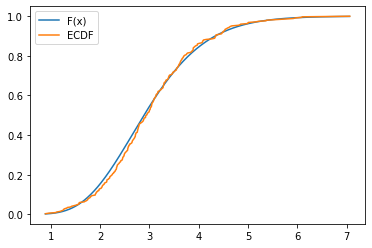

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF

x = np.arange(min(random_values), max(random_values), 0.01)
plt.plot(x, distribution.cdf(x), label='F(x)')

# Utilizarei os mesmos dados gerados anteriormente para gerar o gráfico da ECDF
ecdf = ECDF(random_values)
plt.plot(ecdf.x, ecdf.y, label='ECDF')

plt.legend()
plt.show()